In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.netcdf as nc
import xarray as xr
import cartopy.crs as ccrs
from netCDF4 import Dataset
import cartopy.feature as cfeature
import matplotlib.pylab as pltlab
import matplotlib as mpl
import carto
from matplotlib.colors import LinearSegmentedColormap 
from matplotlib.colors import BoundaryNorm
import geopy.distance
import scipy.interpolate
from scipy.interpolate import griddata
import matplotlib.mlab as mlab


# Definition des longitudes latitudes max :
min_lon = 65
max_lon = 83
min_lat = 3
max_lat = 30

In [2]:
# Ouverture fichier en utilisant la bibiothèque xarray  
dataGebco= xr.open_dataset('gebco_2021_n30.0_s-5.0_w55.0_e83.0.nc')
dataGebco


<xarray.Dataset>
Dimensions:    (lat: 8400, lon: 6720)
Coordinates:
  * lat        (lat) float64 -4.998 -4.994 -4.99 -4.985 ... 29.99 29.99 30.0
  * lon        (lon) float64 55.0 55.01 55.01 55.01 ... 82.99 82.99 82.99 83.0
Data variables:
    elevation  (lat, lon) int16 ...
Attributes: (12/36)
    title:                           The GEBCO_2021 Grid - a continuous terra...
    summary:                         The GEBCO_2021 Grid is a continuous, glo...
    keywords:                        BATHYMETRY/SEAFLOOR TOPOGRAPHY, DIGITAL ...
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              DOI: 10.5285/c6612cbe-50b3-0cff-e053-6c8...
    naming_authority:                https://dx.doi.org
    ...                              ...
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  1.0
    geospatial_vertical_positive:    up
    identifier_product_doi:          DOI: 10.5285/c6612cbe-50b3-0cff-e053-6c8...
    references:                      DOI: 10.5285/c6612cbe-50b3-0cff-e053-6c8...
    node_offset:                     1.0

In [3]:
# Accès aux variables 

lons = dataGebco['lon']
print(len(lons))
lats = dataGebco['lat']
print(len(lats))
elevation = dataGebco['elevation']
print(elevation)

# longitude et latitude en 2D
lon, lat = np.meshgrid (lons, lats)

6720
8400
<xarray.DataArray 'elevation' (lat: 8400, lon: 6720)>
[56448000 values with dtype=int16]
Coordinates:
  * lat      (lat) float64 -4.998 -4.994 -4.99 -4.985 ... 29.99 29.99 29.99 30.0
  * lon      (lon) float64 55.0 55.01 55.01 55.01 ... 82.99 82.99 82.99 83.0
Attributes:
    standard_name:       height_above_mean_sea_level
    long_name:           Elevation relative to sea level
    units:               m
    grid_mapping:        crs
    sdn_parameter_urn:   SDN:P01::ALATZZ01
    sdn_parameter_name:  Sea floor height (above mean sea level) {bathymetric...
    sdn_uom_urn:         SDN:P06::ULAA
    sdn_uom_name:        Metres


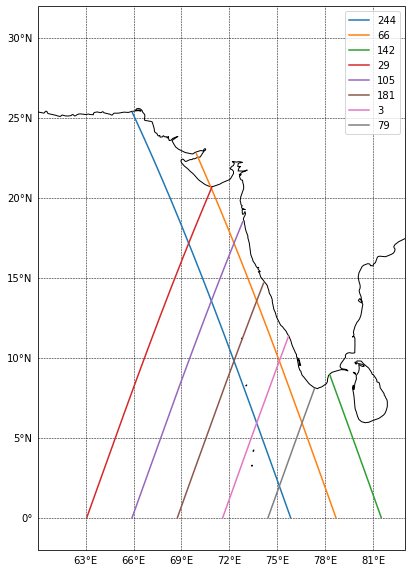

In [4]:
# Ouverture fichiers Xtracks en utilisant la bibiothèque xarray 

# perpendiculaires
data244=xr.open_dataset('ctoh.sla.ref.TP+J1+J2+J3.nindian.244.nc')
data66=xr.open_dataset('ctoh.sla.ref.TP+J1+J2+J3.nindian.066.nc')
data142=xr.open_dataset('ctoh.sla.ref.TP+J1+J2+J3.nindian.142.nc')

#parallèles
data29=xr.open_dataset('ctoh.sla.ref.TP+J1+J2+J3.nindian.029.nc')
data105=xr.open_dataset('ctoh.sla.ref.TP+J1+J2+J3.nindian.105.nc')
data181=xr.open_dataset('ctoh.sla.ref.TP+J1+J2+J3.nindian.181.nc')
data3=xr.open_dataset('ctoh.sla.ref.TP+J1+J2+J3.nindian.003.nc')
data79=xr.open_dataset('ctoh.sla.ref.TP+J1+J2+J3.nindian.079.nc')

# Tracé d'une avec les différentes traces
fig= plt.figure(figsize=(30,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([60, 83, -2, 32], crs=ccrs.PlateCarree())
ax.coastlines()
gridparams = {'crs': ccrs.PlateCarree(), 
              'draw_labels':True, 'linewidth':0.5, 
              'color':'k', 'alpha':1, 'linestyle':'--'}
gl = ax.gridlines(**gridparams, zorder=0) 
gl.top_labels = False
gl.right_labels = False



# perpendiculaires
ax.plot(data244['lon'], data244['lat'], label='244')
ax.plot(data66['lon'], data66['lat'], label='66')
ax.plot(data142['lon'], data142['lat'], label='142')

#parallèles
ax.plot(data29['lon'], data29['lat'], label='29')
ax.plot(data105['lon'], data105['lat'], label='105')
ax.plot(data181['lon'], data181['lat'], label='181')
ax.plot(data3['lon'], data3['lat'], label='3')
ax.plot(data79['lon'], data79['lat'], label='79')

plt.legend()

In [5]:
data66

<xarray.Dataset>
Dimensions:               (nbpoints: 396, nbcycles: 1004)
Dimensions without coordinates: nbpoints, nbcycles
Data variables: (12/13)
    lon                   (nbpoints) float32 78.66 78.65 78.63 ... 69.95 69.93
    lat                   (nbpoints) float32 0.01248 0.05162 ... 22.72 22.77
    mssh                  (nbpoints) float32 ...
    cycle                 (nbcycles) int32 ...
    point                 (nbpoints) int32 ...
    time                  (nbpoints, nbcycles) object ...
    ...                    ...
    tide                  (nbpoints, nbcycles) float32 ...
    dac                   (nbpoints, nbcycles) float32 ...
    dist_to_coast_gshhs   (nbpoints) float64 ...
    dist_to_coast_stumpf  (nbpoints) float64 ...
    mdt_cnes_cls_18       (nbpoints) float64 ...
    missions_cycles       (nbcycles) float32 ...
Attributes:
    title:        CTOH Along track Sea Level Anomalies
    institution:  CTOH/LEGOS, Toulouse Univ., CNRS, IRD, CNES, UPS, France
    Conventions:  CF-1.6
    history:      creation: 2020/09/10
    contact:      ctoh_products@legos.obs-mip.fr  http://ctoh.legos.obs-mip.fr
    version:      Version X-TRACK: 1.03.post18 - Version mercurial: hgcad1f04...
    doi:          10.6096/CTOH_X-TRACK_2017_02
    reference:    Birol, F. et al. “Coastal Applications from Nadir Altimetry...
    pass_number:  066
    handbook:     https://www.aviso.altimetry.fr/fileadmin/documents/data/too...

In [6]:
data105

<xarray.Dataset>
Dimensions:               (nbpoints: 353, nbcycles: 1004)
Dimensions without coordinates: nbpoints, nbcycles
Data variables: (12/13)
    lon                   (nbpoints) float32 65.91 65.92 65.94 ... 72.81 72.83
    lat                   (nbpoints) float32 0.01383 0.04891 ... 18.47 18.52
    mssh                  (nbpoints) float32 ...
    cycle                 (nbcycles) int32 ...
    point                 (nbpoints) int32 ...
    time                  (nbpoints, nbcycles) object ...
    ...                    ...
    tide                  (nbpoints, nbcycles) float32 ...
    dac                   (nbpoints, nbcycles) float32 ...
    dist_to_coast_gshhs   (nbpoints) float64 ...
    dist_to_coast_stumpf  (nbpoints) float64 ...
    mdt_cnes_cls_18       (nbpoints) float64 ...
    missions_cycles       (nbcycles) float32 ...
Attributes:
    title:        CTOH Along track Sea Level Anomalies
    institution:  CTOH/LEGOS, Toulouse Univ., CNRS, IRD, CNES, UPS, France
    Conventions:  CF-1.6
    history:      creation: 2020/09/10
    contact:      ctoh_products@legos.obs-mip.fr  http://ctoh.legos.obs-mip.fr
    version:      Version X-TRACK: 1.03.post18 - Version mercurial: hgcad1f04...
    doi:          10.6096/CTOH_X-TRACK_2017_02
    reference:    Birol, F. et al. “Coastal Applications from Nadir Altimetry...
    pass_number:  105
    handbook:     https://www.aviso.altimetry.fr/fileadmin/documents/data/too...

In [7]:
# Tracé bathymétrie le long de la trace 66

# Ouverture fichier bathy
dataGebco= xr.open_dataset('gebco_2021_n30.0_s-5.0_w55.0_e83.0.nc')
lonGebco = dataGebco['lon']
latGebco = dataGebco['lat']
elevation = dataGebco['elevation']


# Données trace 66
points66 = data66['point']
lat66 = data66['lat']
lon66 = data66['lon']



# Vecteur abscisse
abscisse=[0]
coords_init = (lat66[0], lon66[0])

for i in range (0,395):
    coords_1 = (lat66[i+1], lon66[i+1])
    abscisse.extend([geopy.distance.geodesic(coords_1, coords_init).km]) 
    
print(abscisse)



# vecteur ordonnées

#génération des points d'interpolation
#lat=np.arrange()


# longitude et latitude en 2D
lon, lat = np.meshgrid (lonGebco, latGebco)

newlatlon = scipy.interpolate.griddata((latGebco, lonGebco), elevation, (lat, lon), method="linear")
#print(zz)

ordonnee=[]
#for i in range (0,396):
    #z.extend(scipy.interpolate.griddata(lat66[i],lon66[i], elevation, lat[i], lon[i], method='cubic'))
    #ordonnee.extend([elevation[lat66[i],lon66[i]]]) 
    #print([elevation[lat66[i],lon66[i]]])
    
print(ordonnee)

[0, 4.590835640608368, 10.787247951624439, 16.862994894353978, 23.028191183661985, 29.175180876935165, 35.234436483210665, 41.27479058477317, 47.32480896784394, 53.44860484649728, 59.676710177183324, 65.8502125053595, 72.11345636506402, 78.35622512033673, 84.52961154046965, 90.69734718159579, 96.76504067473789, 102.93265004511898, 109.02996662740642, 115.147891245011, 121.28353707815361, 127.3250779645228, 133.48138783025996, 139.64692025706475, 145.8413380000309, 151.9215632489011, 158.05612308424548, 164.24289648617767, 170.30824788414935, 176.3536711216329, 182.4268090776858, 188.5795084532515, 194.76452828256393, 200.99562249297568, 207.30443018935387, 213.58306453755267, 219.73529840754608, 225.88998164383108, 231.96976180146035, 238.12294651748485, 244.2198091937108, 250.35356476172848, 256.4624033971993, 262.5659493889488, 268.7016486174537, 274.9407316110862, 281.0747432380157, 287.20074478790286, 293.37793324717444, 299.50710894227757, 305.5330312059687, 311.6245537731399, 317

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8400,) and arg 1 with shape (6720,).

In [ ]:
# Tracé moyenne niveau de la mer en août

# Données trace 66
points66 = data66['point']
lat66 = data66['lat']
lon66 = data66['lon']
sla66=data66['sla']

#print(sla66[0,1])

#print(sla66)

# Vecteur abscisse
abscisse=[0]
coords_init = (lat66[0], lon66[0])

for i in range (0,395):
    coords_1 = (lat66[i+1], lon66[i+1])
    abscisse.extend([geopy.distance.geodesic(coords_1, coords_init).km]) 
    
#print(abscisse)

# vecteur ordonnees

fig=plt.figure()
ax=plt.axes()
ordonnee=[]

#y=np.mean(sla66[0,:])

#print(y)

y=[]


    y.extend([np.mean(sla66[i,:])])
    

 #   print(sla66[i,1003])

print(y)

ax.plot(abscisse,y)


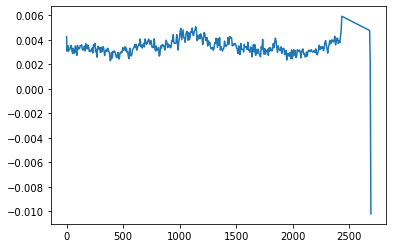

In [15]:
# Tracé moyenne niveau de la mer en août

# Données trace 66
points66 = data66['point']
lat66 = data66['lat']
lon66 = data66['lon']
sla66=data66['sla']
time66=data66['time']

# Vecteur abscisse
abscisse=[0]
coords_init = (lat66[0], lon66[0])

for i in range (0,395):
    coords_1 = (lat66[i+1], lon66[i+1])
    abscisse.extend([geopy.distance.geodesic(coords_1, coords_init).km]) 

#Vecteur ordonnée : moyenne des SLA sur la période d'aout en fonction du placement sur la trace

ordonnee=[]

for i in range (0,396):
    #print('point', i, time66[i,:])
    ordonnee.extend([np.mean(sla66[i,:])])

fig=plt.figure()
ax=plt.axes()
ax.plot(abscisse,ordonnee)


#for i in range (0,100):
 #   print('cycle', i, time66[:,i])